In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import missingno as msno
from IPython.display import HTML
from matplotlib import pylab
from matplotlib_venn import venn3, venn3_circles, venn2
import seaborn as sns

%matplotlib inline

In [2]:
#Script to hide code cells
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>

<a href="javascript:code_toggle()">Code</a>.''')

In [3]:
plt.rcParams['axes.facecolor'] = '#EAffd0'
plt.rcParams['axes.prop_cycle'] = plt.cycler(color = ['#f38181','#95e1d3','#fce38a'])

# EXPLORATORY DATA ANALYSIS

To get an overview of our data, we combine the necessary values into one single table. This helps us run a correlation heat map on all columns and find out hidden trends. 
 
### Table Column Types
 
Let us take a look at the columns we have on our table and their datatypes. As we can see, most columns have expected values. Certain columns have float64 as there are empty values. 
 v                                                                  
<!---
Placeholder for Column Description
--> 

In [4]:
kernels = pd.read_csv('../Datasets/KernelsCleaned.csv')

In [5]:
display(HTML('<font size="4">Table 1 - Datatypes</font>'))
kernels.dtypes

Id                             int64
AuthorUserId                   int64
CurrentKernelVersionId       float64
ForkParentKernelVersionId    float64
ForumTopicId                 float64
FirstKernelVersionId         float64
IsProjectLanguageTemplate       bool
CurrentUrlSlug                object
Medal                        float64
TotalViews                     int64
TotalComments                  int64
TotalVotes                     int64
LanguageName                  object
dtype: object

### Data overview
 
Now, let us take a look at our data. First, we recongize the frame size of the entire table. This table has 201981 data samples with 13 rows. 

From the above table, we can make certain inferences. 
* The values for various **Id** are not relevant in this overview as they are merely unique identifiers. 
* We can see that only 7347 kernels out of over 200000 have received medals. 
* Over 50% of the kernels that have received medals have received only bronze and shows that gold medals are rare. 
* We can infer the users of kaggle are not inclined at commenting on a kernel or voting as the discrepancy shows in the mean of total views, comments and votes. 
* The large difference between standard deviation of total votes and its mean infers that only the top kernels get votes while a majority of the kernels dont receive any votes at all  
 
For further inferences, we need to look at the data even more carefully. 
 

In [6]:
display(HTML('<font size="4">Table 2 - Data Head</font>'))
display(HTML(kernels.head().to_html(index=False)))

Id,AuthorUserId,CurrentKernelVersionId,ForkParentKernelVersionId,ForumTopicId,FirstKernelVersionId,IsProjectLanguageTemplate,CurrentUrlSlug,Medal,TotalViews,TotalComments,TotalVotes,LanguageName
1,2505,205.0,NaN,NaN,1.0,False,hello,NaN,24,0,0,R
2,3716,1748.0,NaN,26670.0,2.0,False,rf-proximity,3.0,7547,1,12,R
4,3716,41.0,NaN,NaN,9.0,False,r-version,NaN,9,0,0,R
5,28963,19.0,NaN,NaN,13.0,False,test1,NaN,9,0,0,R
6,3716,21.0,NaN,NaN,15.0,False,are-icons-missing,NaN,7,0,0,R


In [7]:
display(HTML('<font size="4">Table 3 - Statistical Overview</font>'))
kernels.describe()

,Id,AuthorUserId,CurrentKernelVersionId,ForkParentKernelVersionId,ForumTopicId,FirstKernelVersionId,Medal,TotalViews,TotalComments,TotalVotes
count,2.019810e+05,2.019810e+05,1.655960e+05,6.368500e+04,15698.000000,2.008660e+05,7347.000000,201981.000000,201981.000000,201981.000000
mean,4.118388e+05,7.943445e+05,1.828903e+06,1.349575e+06,43767.133138,1.537051e+06,2.661222,297.071487,0.545279,1.817597
std,5.112717e+05,5.408731e+05,1.861784e+06,1.512547e+06,15572.369904,1.760108e+06,0.615812,2848.559756,6.059064,21.696009
min,1.000000e+00,3.680000e+02,1.900000e+01,1.000000e+00,14433.000000,1.000000e+00,1.000000,0.000000,0.000000,0.000000
25%,8.950000e+04,4.155380e+05,4.706428e+05,3.075340e+05,30157.250000,3.315360e+05,2.000000,13.000000,0.000000,0.000000
50%,1.879810e+05,6.888010e+05,1.059955e+06,6.259190e+05,43705.000000,8.829585e+05,3.000000,23.000000,0.000000,0.000000
75%,4.858860e+05,1.001888e+06,2.599765e+06,2.456081e+06,57428.500000,1.889528e+06,3.000000,85.000000,0.000000,0.000000
max,1.994521e+06,2.431709e+06,6.954829e+06,6.953839e+06,70160.000000,6.954829e+06,3.000000,432573.000000,894.000000,2883.000000


### Missing Data


As told earlier, some part of our data is missing. This is not an error in the dataset. Rather, the simply does not exist. For example, we may find the medals column to be empty because certain kernels may not have received a medal at all. To visualize this better, the following matrix helps us.
  
* Most of medals is obviously empty as we inferred earlier. This is because most kernels on kaggle do not receive any medal out of the three tiers. 
 
* **ForumTopicId** and **CurrentKernelVersionId** can have missing values as some kernels may not have a forum due to inactivity or lack of comments. 
 
* **ForkParentKernelVersionId** has missing values as many kernels are started straight from scratch. This column only has values if the kernel is forked from another kernel on kaggle. 

 

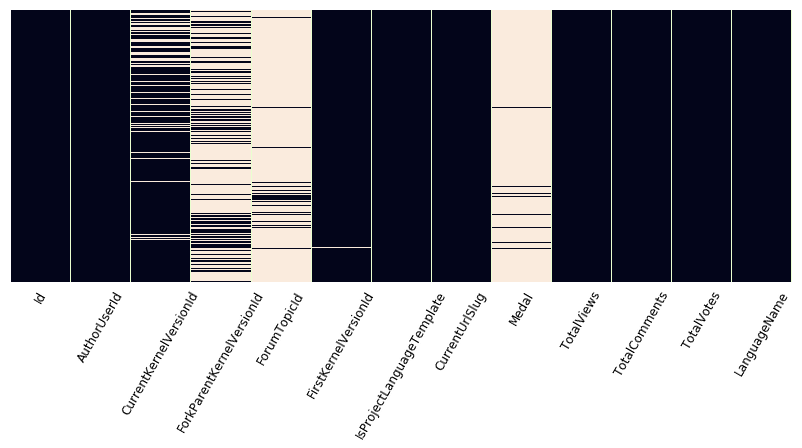

In [8]:
fig1 = plt.figure(figsize = (14,5))
ax = sns.heatmap(kernels.isnull(),cbar = False) #turn off colorbar for heatmap
plt.yticks([]) #turn off yticks
plt.xticks(rotation=60,fontsize=12)
for tic in ax.xaxis.get_major_ticks(): #remove x axis tick dashes
    tic.tick1On = tic.tick2On = False
plt.savefig('fig1.png',bbox_inches='tight')
plt.show()

### Count Relationships

The below table shows the presence of a forum for kernels that don't have a medal. As we can see, over 95% of the kernels without a medal don't have a forum. This confirms our inference from the heatmap.

In [9]:
#Finding relation between forum ID and Medal
temp = kernels[['ForumTopicId','Medal']].copy()
temp = temp[(temp.Medal.isnull())].copy()
temp['ForumTopicId'].fillna(0,inplace = True)
temp.loc[temp['ForumTopicId'] > 0] = 1
temp = temp['ForumTopicId'].value_counts()
temp = temp.to_frame().reset_index()
temp.columns = ['Forum_Status','Count']
temp.Forum_Status = temp.Forum_Status.astype(str)
temp.iloc[0,0] = 'No Forum'
temp.iloc[1,0] = 'Forum Exists'
display(HTML(temp.to_html(index=False)))

Forum_Status,Count
No Forum,185277
Forum Exists,9357


The below table shows the number of kernels with respect to number of users. We can clearly see from this that over 50% of the users only have one kernel on Kaggle and over 90% of the users have less than 5 kernels submitted.  
 
 The graph paints a clearer picture. Due to extremities in the values and a highly skewed distribution, we have divided the table into two portions. The left half shows Users with a low kernel count while the right half shows users with a high kernel(>100). From the left half, it is clear that as the kernel count increases, the user count decreases. We can infer from this that fewer users have a higher number of kernels. 
  
  On the right half, we have the distribution of users who have over a 100 kernels. It is clear that a maximum of 4 users have any number of kernels over 100 and there is only one user for each kernel count above 200. 


In [10]:
#Number of kernels wrt Users
temp = kernels['AuthorUserId'].value_counts().reset_index()
temp.columns = ['AuthorUserId','NumberOfKernels']
temp = temp['NumberOfKernels'].value_counts().reset_index()
temp.columns = ['NoOfKernels','NoOfUsers']
temp = temp.sort_values('NoOfKernels')
display(HTML('<font size="4">Table 5 - Kernel User Count Relationship</font>'))
display(HTML(temp.head().to_html(index=False)))

NoOfKernels,NoOfUsers
1,45999
2,14668
3,6758
4,3710
5,2502


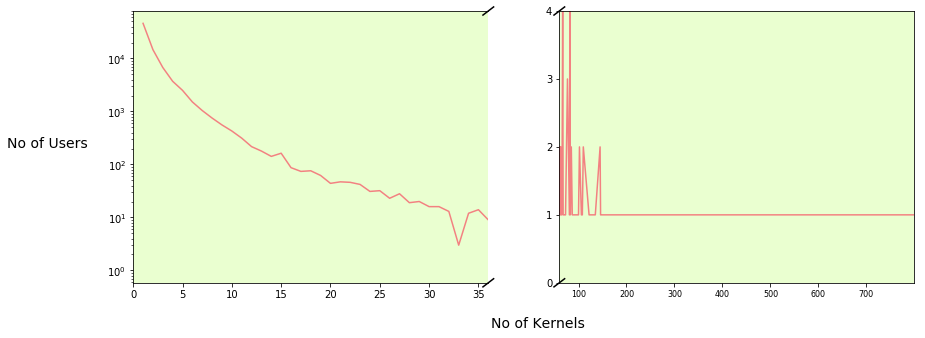

In [11]:
#Graph for Kernel Count per User Count
fig2,(ax,ax2) = plt.subplots(1,2,figsize = (14,5))

ax.plot(temp.NoOfKernels,temp.NoOfUsers)
ax2.plot(temp.NoOfKernels,temp.NoOfUsers)

#Setup break in graph
ax.set_xlim(0,36)
ax2.set_xlim(60,800)
ax2.set_ylim(0,3)
ax.spines['right'].set_visible(False)
ax.set_yscale('log')

#Set ticks
ax.xaxis.set_ticks(np.arange(0, 36, 5))
ax2.xaxis.set_ticks(np.arange(100, 800, 100))
ax2.yaxis.set_ticks(np.arange(0, 5, 1))
ax2.tick_params(axis = 'x', which = 'major', labelsize = 8)


#Set small dash to show break
d = .015
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)
kwargs.update(transform=ax2.transAxes)  
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)



fig2.text(0.48,0,'No of Kernels',fontsize=14)
fig2.text(0,0.5,'No of Users',fontsize=14)
plt.savefig('fig2.png',bbox_inches='tight')
plt.show()

### Language and Medal Trends

 The below chart shows us the distribution of languages which kernels are submitted in. As we can see, an overwhelming majority of the users prefer using Python as their preferred language over R. 

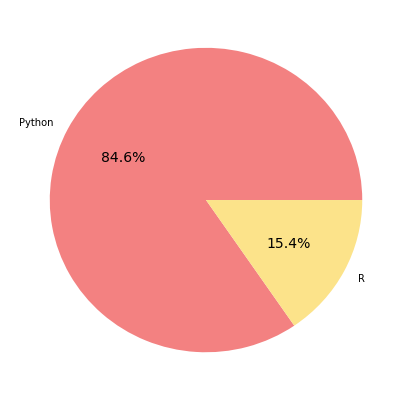

In [12]:
#Number of Kernels per Language
temp = kernels['LanguageName'].value_counts().reset_index()
temp.columns = ['LanguageName','Count']

fig3 = plt.figure(figsize = (7,7))
plt.pie(temp.Count,labels = ['Python','R'],autopct="%1.1f%%", textprops={'fontsize': 14},colors = ['#f38181','#fce38a'])
plt.savefig('fig3.png',bbox_inches='tight')
plt.show()

From our earlier inference in data overview, it was clear that gold was not given to many kernels.In the graph below, we can see the ratio. Nearly three quarters of the kernels that have received medals have received bronze. We should note however, the below pie chart is not represantitve of all kernels on Kaggle. Rather, this is the medal distribution among **kernels that have received medals only**

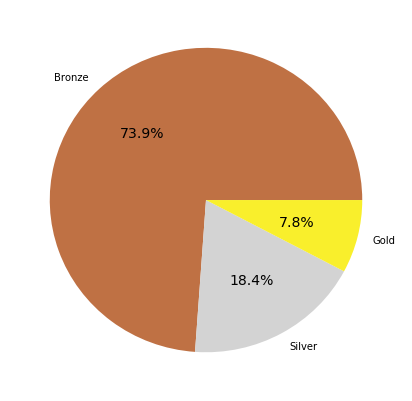

In [13]:
#Medals
medal = kernels[['Id','Medal','LanguageName']].copy()
temp = medal['Medal'].value_counts().reset_index()
temp.columns = ['Medal','Count']

fig4 = plt.figure(figsize = (7,7))
plt.pie(temp['Count'],labels=['Bronze','Silver','Gold'],colors = ['#bf7144','#d3d3d3','#f9ef2c'],autopct="%1.1f%%",textprops={'fontsize': 14})
plt.savefig('fig4.png',bbox_inches='tight')
plt.show()

The following chart is a visual representation of medal distribution spread across language. There are two important things to note here. 
**This graph is shown as a representation of percentage of medals of each category given to the kernels of a language and not a sum of kernels. The data disproportion comes from a large difference of available kernels between R and Python**  
 
 From this, we can see that the medal algorithm does not prefer one language over another. However, a higher percentage of R kernels receive Bronze medals whereas Python kernels receive a better portion of the Gold tier medals.

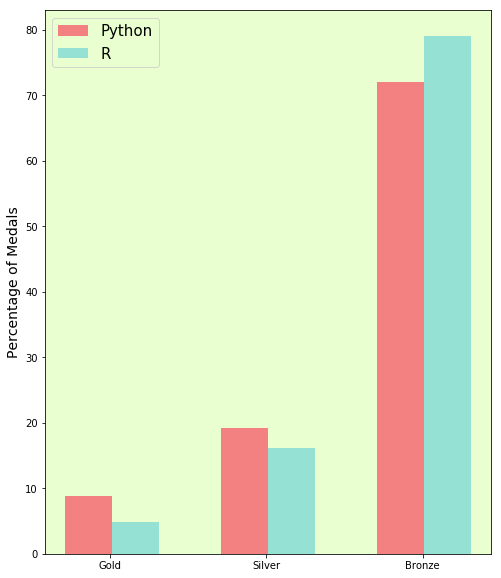

In [14]:
#Language Wise Medal Distribution
temp = medal.loc[medal['LanguageName'] == 'Python']
temp1 = medal.loc[medal['LanguageName'] == 'R']
temp = temp['Medal'].value_counts().reset_index()
temp.columns = ['Medal','Count']
temp['Percent'] = temp['Count']/sum(temp['Count'])*100
temp1 = temp1['Medal'].value_counts().reset_index()
temp1.columns = ['Medal','Count']
temp1['Percent'] = temp1['Count']/sum(temp1['Count'])*100


fig5 = plt.figure(figsize = (8,10))
plt.bar(temp['Medal'],temp['Percent'],tick_label=['Bronze','Silver','Gold'],width = 0.3,align='center')
plt.bar(temp1['Medal']+0.3,temp1['Percent'],tick_label=['Bronze','Silver','Gold'],width = 0.3,align='center')
plt.ylabel('Percentage of Medals',fontsize=14)
plt.xticks([3.14,2.14,1.14]) #slight offset for ticks to center
plt.legend(('Python','R'),prop={'size':15})
plt.savefig('fig5.png',bbox_inches='tight')
plt.show()

### Votes, Comments and Views
 
 All Kaggle kernels have these values which combine to tell us the visiblity it has which in turn tells how popular/good the kernel is. The dataset we have have has no missing values for these three columns. 
  
 First, we get an overall view of the three columns by visualizing it in the form of a venn diagram. The left diagram shows some key points 
 * A kernel does not have votes or comments without views. This is obvious as there are no intersections of views with other columns that are exclusive.  
 
 * A vast majority of the kernels simply do not have comments or votes. While 98% of the kernels have atleasy 1 view, only 18% of the kernels have votes and 7% have comments. 
 
 * If a kernel has a comment, it is likely to have a vote. This shows that users have a tendency to comment on kernels that only have votes. 
  
 * Nearly 2/3rd of the users who vote on a kernel prefer not to comment. 

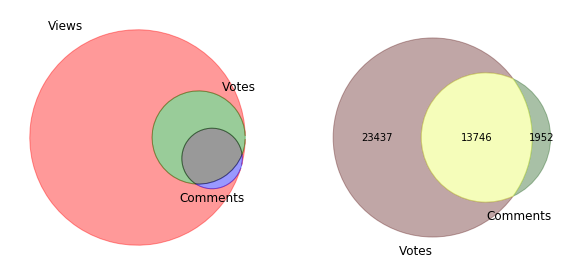

In [15]:
#Relation between comments and votes
temp = kernels[['TotalViews','TotalVotes','TotalComments']].copy()
temp.columns = ['views','votes','comments']
Abc = (temp.loc[(temp.views > 0) & (temp.votes == 0) & (temp.comments == 0)]).count()
aBc = (temp.loc[(temp.views == 0) & (temp.votes > 0) & (temp.comments == 0)]).count()
ABc = (temp.loc[(temp.views > 0) & (temp.votes > 0) & (temp.comments == 0)]).count()
abC = (temp.loc[(temp.views == 0) & (temp.votes == 0) & (temp.comments > 0)]).count()
AbC = (temp.loc[(temp.views > 0) & (temp.votes == 0) & (temp.comments > 0)]).count()
aBC = (temp.loc[(temp.views == 0) & (temp.votes > 0) & (temp.comments > 0)]).count()
ABC = (temp.loc[(temp.views > 0) & (temp.votes > 0) & (temp.comments > 0)]).count()

fig, axes = plt.subplots(1,2,squeeze = False,figsize = (10,10))
v = venn3(subsets = (Abc[0],aBc[0],ABc[0],abC[0],AbC[0],aBC[0],ABC[0]),set_labels = ('Views', 'Votes', 'Comments'),ax=axes[0][0])
v.get_patch_by_id('100').set_color('red')
v.get_patch_by_id('110').set_color('green')
v.get_patch_by_id('101').set_color('blue')
v.get_patch_by_id('111').set_color('black')

for text in v.set_labels:
    text.set_fontsize(12)
    
v.get_label_by_id('100').set_alpha(0)
v.get_label_by_id('110').set_alpha(0)
v.get_label_by_id('101').set_alpha(0)
v.get_label_by_id('111').set_alpha(0)

Ab = (temp.loc[(temp.votes > 0) & (temp.comments == 0)]).count()
aB = (temp.loc[(temp.votes == 0) & (temp.comments > 0)]).count()
AB = (temp.loc[(temp.votes > 0) & (temp.comments > 0)]).count()
v1 = venn2(subsets = (Ab[0], aB[0], AB[0]),set_labels = ('Votes', 'Comments'),ax=axes[0][1])
v1.get_patch_by_id('10').set_color('#632222')
v1.get_patch_by_id('01').set_color('#266322')
v1.get_patch_by_id('11').set_color('#E7FC53')

Based on comments and views, we have devised a popularity score. In this score, votes are given twice the weightage of a comment while views are not included. The score has been normalized to a range of 100. As we can see from the distribution, much of the scores are below 5 indicating low popularity for most of the kernels. 
 
 The right hand side graph shows the popularity scores for kernels but kernels with no medals have been removed. The graph shape is similar but a lot of kernels with minute popularities have been eliminated.

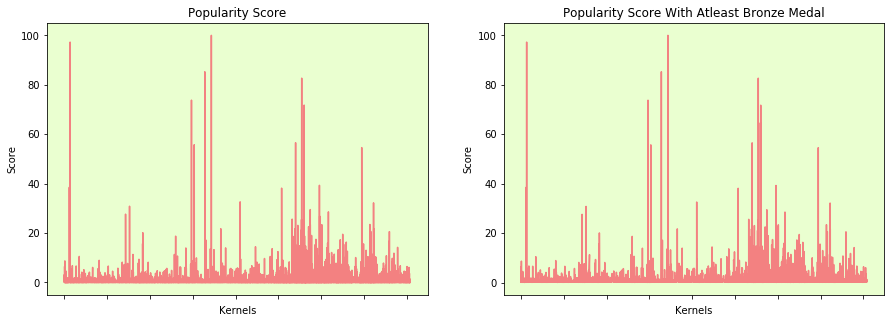

In [16]:
#Popularity Score
popularity = kernels[['TotalVotes','TotalComments','Medal']].copy()
popularity.columns = ['votes','comments','medal']
popularity['score'] = popularity.votes*2 + popularity.comments
popularity = popularity[popularity.score != 0]
popularity['score'] = ((popularity.score - min(popularity.score))/(max(popularity.score) - min(popularity.score)))*100
fig,ax = plt.subplots(1,2,figsize = (15,5))
ax[0].plot(popularity.score)
ax[0].set_xticklabels([])
ax[0].set_ylabel('Score')
ax[0].set_xlabel('Kernels')
ax[0].set_title('Popularity Score')
popularity_m = popularity[~popularity.medal.isnull()]
ax[1].plot(popularity_m.score)
ax[1].set_xticklabels([])
ax[1].set_ylabel('Score')
ax[1].set_xlabel('Kernels')
ax[1].set_title('Popularity Score With Atleast Bronze Medal')
plt.show()

Now, we find and plot the popularity scores and see how it correlates to the medal system. We get the expected result from the graph. We can infer two things - 
* The number of bronze medals awarded are higher compared to silver and silver is higher compared to bronze
* The scores of bronze medals are consistently low i.e. below 10. 
* Silver medal kernels have a better score but not by much. Most scores are still below 20. 
* Gold medal kernels are of significantly higher quality but with much more variance. Most scores are above 20

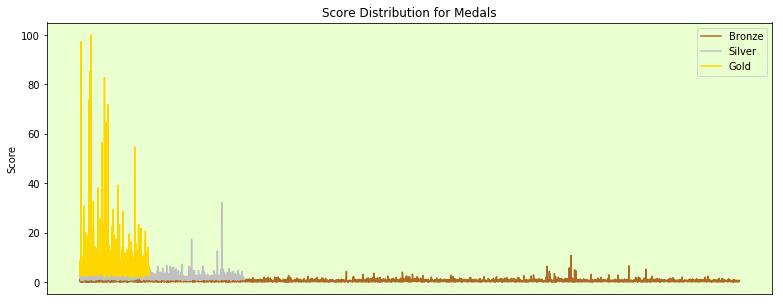

In [17]:
popularity_m = popularity_m[['medal','score']]
pbronze = popularity_m.loc[popularity.medal == 3,['medal','score']].reset_index()
psilver = popularity_m.loc[popularity.medal == 2,['medal','score']].reset_index()
pgold = popularity_m.loc[popularity.medal == 1,['medal','score']].reset_index()
fig,ax = plt.subplots(1,1,figsize = (13,5))
ax.plot(pbronze.index,pbronze.score,color = '#ad6a27',label = 'Bronze')
ax.plot(psilver.index,psilver.score,color = 'Silver',label = 'Silver')
ax.plot(pgold.index,pgold.score,color = 'Gold',label = 'Gold')
ax.set_title('Score Distribution for Medals')
ax.set_ylabel('Score')
ax.legend()
ax.set_xticks([])
plt.show()

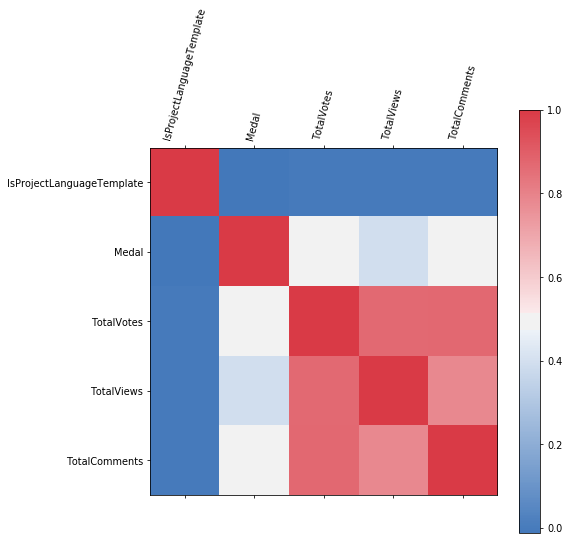

In [18]:
def plot_corr(df):
    corr = df.corr()
    col = sns.diverging_palette(250, 10, as_cmap=True)
    fig, ax = plt.subplots(figsize=(8,8),dpi = 70)
    hm = ax.matshow(corr,cmap = col,)
    plt.xticks(range(len(corr.columns)), corr.columns,rotation=75,fontsize = 10)
    plt.yticks(range(len(corr.columns)), corr.columns,fontsize = 10)
    plt.colorbar(hm)
hmk = kernels[['IsProjectLanguageTemplate','Medal','TotalVotes','TotalViews','TotalComments']].copy()
hmk.loc[hmk.Medal == 1,'Medal'] = 4
hmk.loc[hmk.Medal == 3,'Medal'] = 1
hmk.loc[hmk.Medal == 4,'Medal'] = 3
plot_corr(hmk)

In [19]:
kernels.dtypes

Id                             int64
AuthorUserId                   int64
CurrentKernelVersionId       float64
ForkParentKernelVersionId    float64
ForumTopicId                 float64
FirstKernelVersionId         float64
IsProjectLanguageTemplate       bool
CurrentUrlSlug                object
Medal                        float64
TotalViews                     int64
TotalComments                  int64
TotalVotes                     int64
LanguageName                  object
dtype: object